 # Heart Failure Prediction

In [5]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Seaborn theme
sns.set_theme(palette="mako")

# EDA

- **Age**: Age of the patient [Years]
- **Sex**: Sex of the patient [M: Male, F: Female]
- **ChestPainType**: Chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- **RestingBP**: Resting blood pressure [mm Hg]
- **Cholesterol**: Serum cholesterol [mg/dL]
- **FastingBS**: Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- **RestingECG**: Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- **MaxHR**: Maximum heart rate achieved [Numeric value between 60 and 202]
- **ExerciseAngina**: Exercise-induced angina [Y: Yes, N: No]
- **Oldpeak**: Oldpeak = ST [Numeric value measured in depression]
- **ST_Slope**: The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- **HeartDisease**: Output class [1: heart disease, 0: Normal]

In [7]:
csv = pd.read_csv("data/heart.csv")
df = csv.copy()

In [8]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [9]:
df.shape

(918, 12)

In [10]:
# There is no missing value
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [13]:
num_cols = df[["Age","RestingBP","Cholesterol","MaxHR","Oldpeak"]]
num_cols.head(10)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,40,140,289,172,0.0
1,49,160,180,156,1.0
2,37,130,283,98,0.0
3,48,138,214,108,1.5
4,54,150,195,122,0.0
5,39,120,339,170,0.0
6,45,130,237,170,0.0
7,54,110,208,142,0.0
8,37,140,207,130,1.5
9,48,120,284,120,0.0


In [14]:
cat_cols = df[["Sex","ChestPainType","FastingBS","RestingECG","ExerciseAngina","ST_Slope","HeartDisease"]]
cat_cols.head(10)

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,M,ATA,0,Normal,N,Up,0
1,F,NAP,0,Normal,N,Flat,1
2,M,ATA,0,ST,N,Up,0
3,F,ASY,0,Normal,Y,Flat,1
4,M,NAP,0,Normal,N,Up,0
5,M,NAP,0,Normal,N,Up,0
6,F,ATA,0,Normal,N,Up,0
7,M,ATA,0,Normal,N,Up,0
8,M,ASY,0,Normal,Y,Flat,1
9,F,ATA,0,Normal,N,Up,0


# Visualisation
## Categorical Values

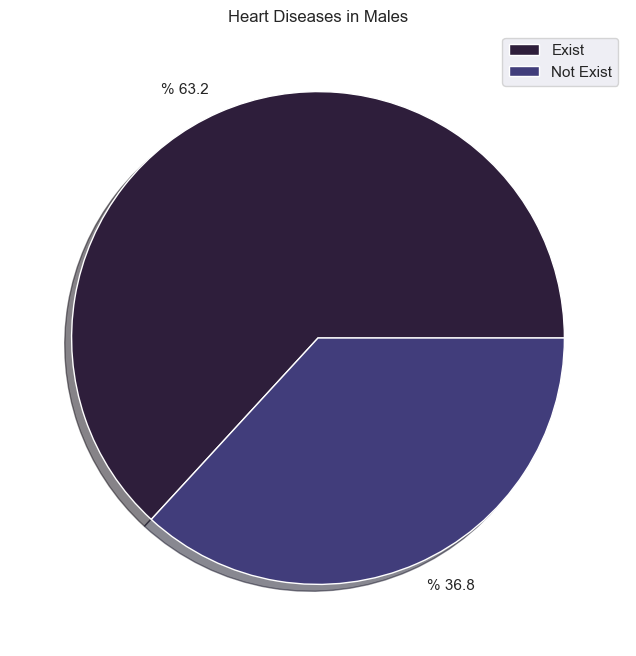

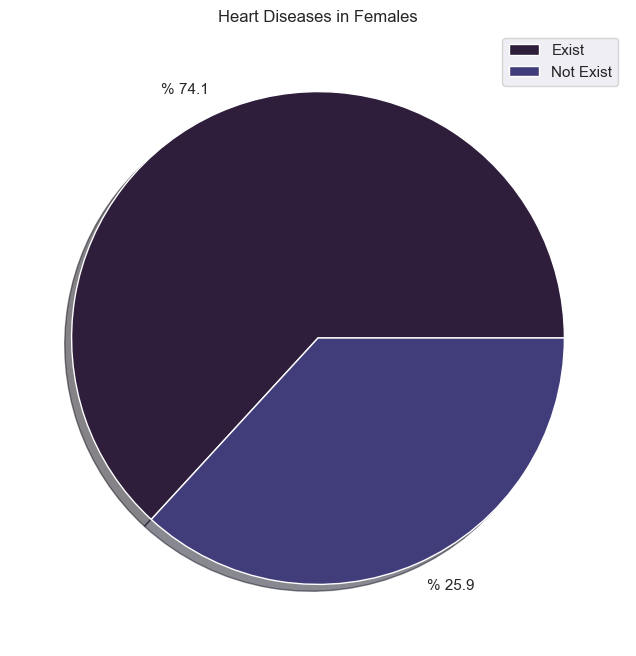

In [15]:
# Insight : The rate of heart disease in female patients is higher than the rate of heart disease in male patients. Maybe the number of observations of female patients is less.

m_array = np.array(df.loc[(df["Sex"] == "M")]["HeartDisease"].value_counts(normalize=True) * 100)
n_array = np.array(df.loc[(df["Sex"] == "F")]["HeartDisease"].value_counts(normalize=True) * 100)

def male_pie():
    plt.figure(figsize=(15,8))
    plt.pie(m_array,labels=["% " + str(round(m_array[0],1)),"% " + str(round(m_array[1],1))],shadow=True)
    plt.title("Heart Diseases in Males")
    plt.legend(labels=["Exist","Not Exist"])
    plt.show()
    
def female_pie():
    plt.figure(figsize=(15,8))
    plt.pie(m_array,labels=["% " + str(round(n_array[0],1)),"% " + str(round(n_array[1],1))],shadow=True)
    plt.title("Heart Diseases in Females")
    plt.legend(labels=["Exist","Not Exist"])
    plt.show()

male_pie()
female_pie()

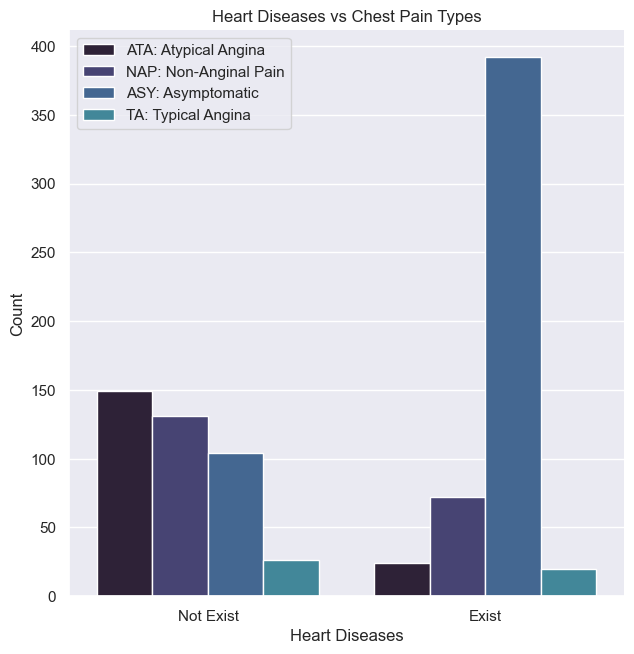

In [16]:
# Insight : Asymptomatic chest pain type is the most seen type who has heart disease.

def cpt_catplot():
    ax = sns.catplot(x="HeartDisease",hue="ChestPainType",kind="count",data=cat_cols,height=6.5,legend=False)
    ax.set(title="Heart Diseases vs Chest Pain Types",xlabel="Heart Diseases",ylabel="Count",xticklabels=["Not Exist","Exist"])
    plt.legend(labels=["ATA: Atypical Angina","NAP: Non-Anginal Pain","ASY: Asymptomatic","TA: Typical Angina"])
    
cpt_catplot()

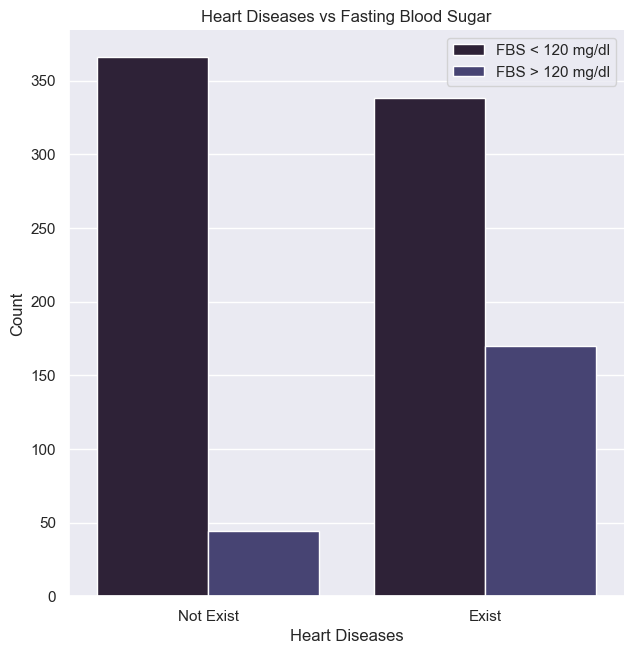

In [17]:
# Fasting blood sugar 1: if FastingBS > 120 mg/dl, 0: otherwise

# Insight : High fasting blood sugar values are more common in people with heart disease than those without heart disease.

def fbs_catplot():
    ax = sns.catplot(x="HeartDisease",hue="FastingBS",kind="count",data=cat_cols,height=6.5,legend=False)
    ax.set(title="Heart Diseases vs Fasting Blood Sugar",xlabel="Heart Diseases",ylabel="Count",xticklabels=["Not Exist","Exist"])
    plt.legend(labels=["FBS < 120 mg/dl","FBS > 120 mg/dl"])

fbs_catplot()

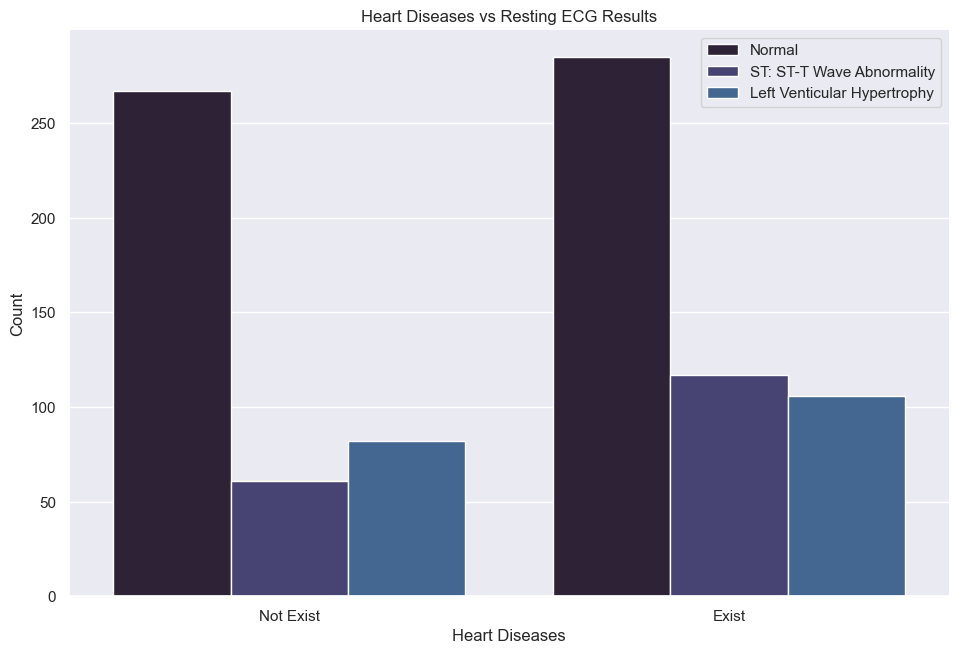

In [18]:
def recg_catplot():
    ax = sns.catplot(x="HeartDisease",hue="RestingECG",kind="count",data=cat_cols,height=6.5,legend=False,aspect = 1.5)
    ax.set(title="Heart Diseases vs Resting ECG Results",xlabel="Heart Diseases",ylabel="Count",xticklabels=["Not Exist","Exist"])
    plt.legend(labels=["Normal", "ST: ST-T Wave Abnormality","Left Venticular Hypertrophy"])

recg_catplot()

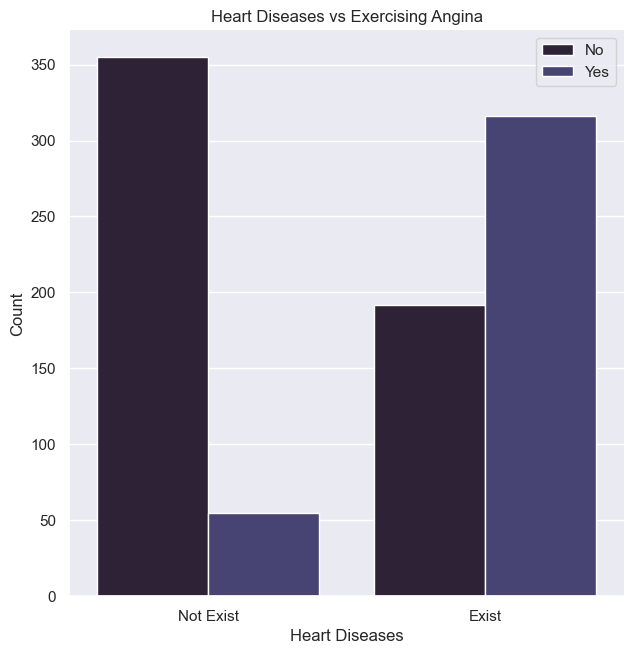

In [19]:
# Insight : Exercise angina is common in people with heart disease.

def ea_catplot():
    ax = sns.catplot(x="HeartDisease",hue="ExerciseAngina",kind="count",data=cat_cols,height=6.5,legend=False)
    ax.set(title="Heart Diseases vs Exercising Angina",xlabel="Heart Diseases",ylabel="Count",xticklabels=["Not Exist","Exist"])
    plt.legend(labels=["No", "Yes"])

ea_catplot()

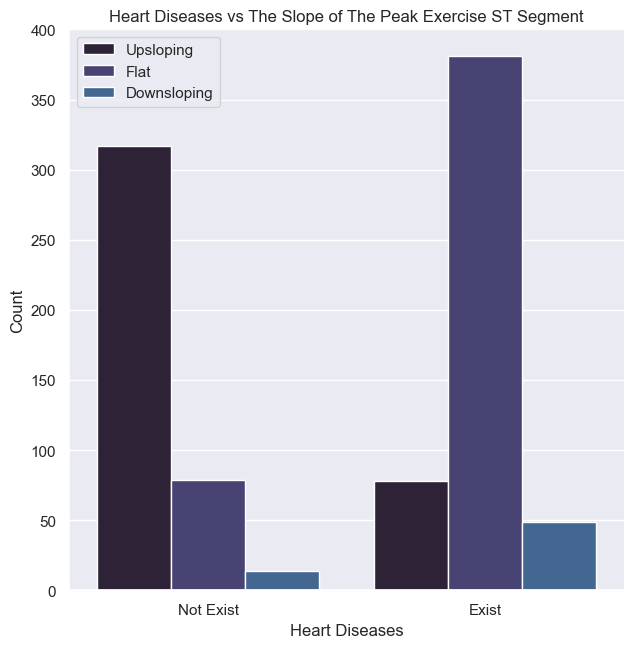

In [20]:
def stslpoe_catplot():
    ax = sns.catplot(x="HeartDisease",hue="ST_Slope",kind="count",data=cat_cols,height=6.5,legend=False)
    ax.set(title="Heart Diseases vs The Slope of The Peak Exercise ST Segment",xlabel="Heart Diseases",ylabel="Count",xticklabels=["Not Exist","Exist"])
    plt.legend(labels=["Upsloping", "Flat","Downsloping"])

stslpoe_catplot()

## Numerical Values

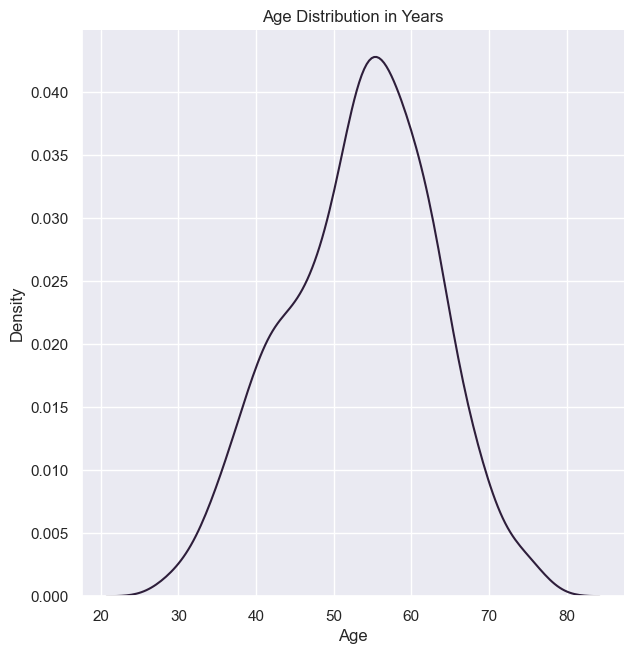

In [21]:
def age_displot():
    ax = sns.displot(x="Age",kind="kde",data=num_cols,height=6.5)
    ax.set(title="Age Distribution in Years")
    
age_displot()

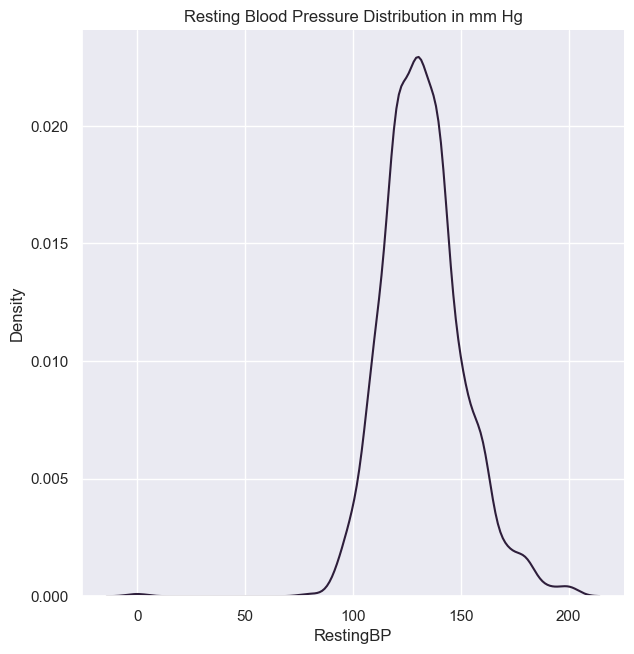

In [22]:
def rbp_displot():
    ax = sns.displot(x="RestingBP",kind="kde",data=num_cols,height=6.5)
    ax.set(title="Resting Blood Pressure Distribution in mm Hg")
    
rbp_displot()

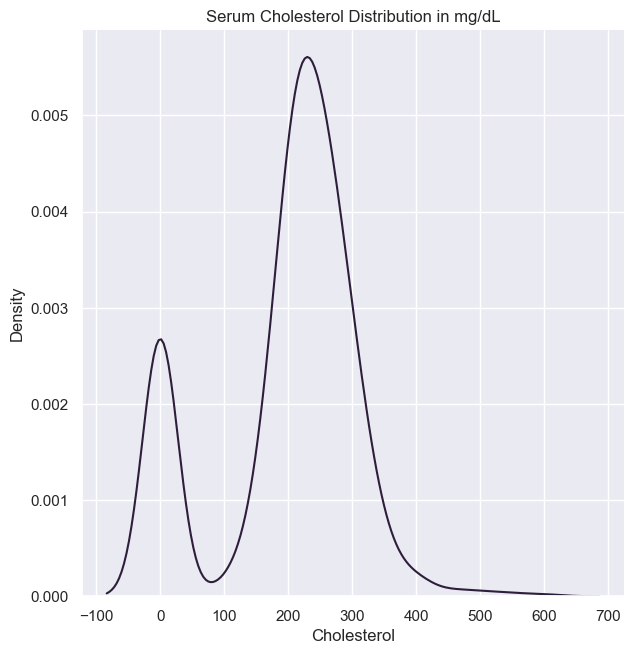

In [23]:
def chol_displot():
    ax = sns.displot(x="Cholesterol",kind="kde",data=num_cols,height=6.5)
    ax.set(title="Serum Cholesterol Distribution in mg/dL")
    
chol_displot()

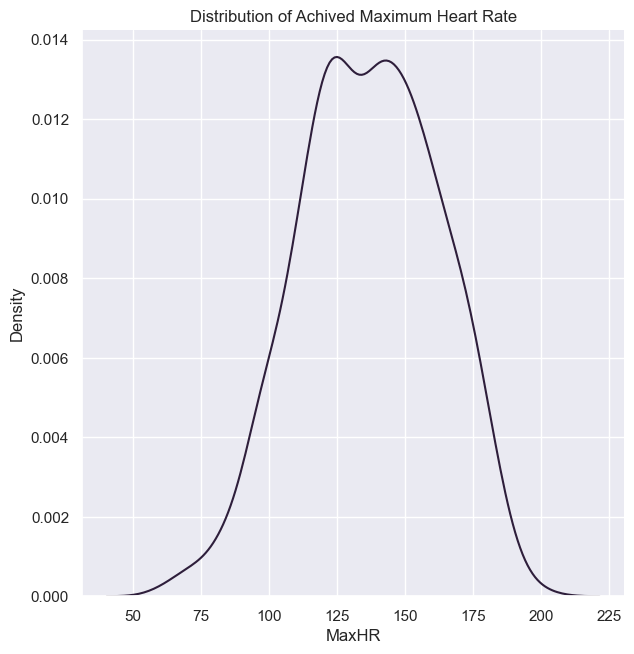

In [24]:
def maxhr_displot():
    ax = sns.displot(x="MaxHR",kind="kde",data=num_cols,height=6.5)
    ax.set(title="Distribution of Achived Maximum Heart Rate")
    
maxhr_displot()

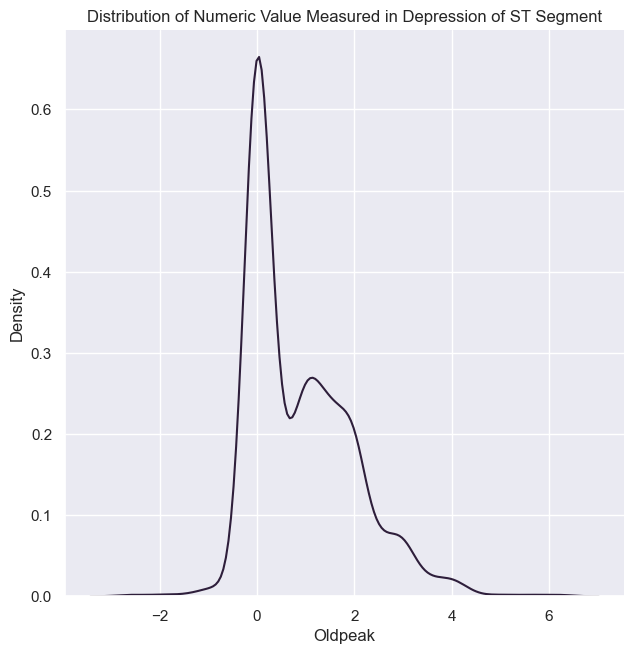

In [25]:
def oldpeak_displot():
    ax = sns.displot(x="Oldpeak",kind="kde",data=num_cols,height=6.5)
    ax.set(title="Distribution of Numeric Value Measured in Depression of ST Segment")
    
oldpeak_displot()

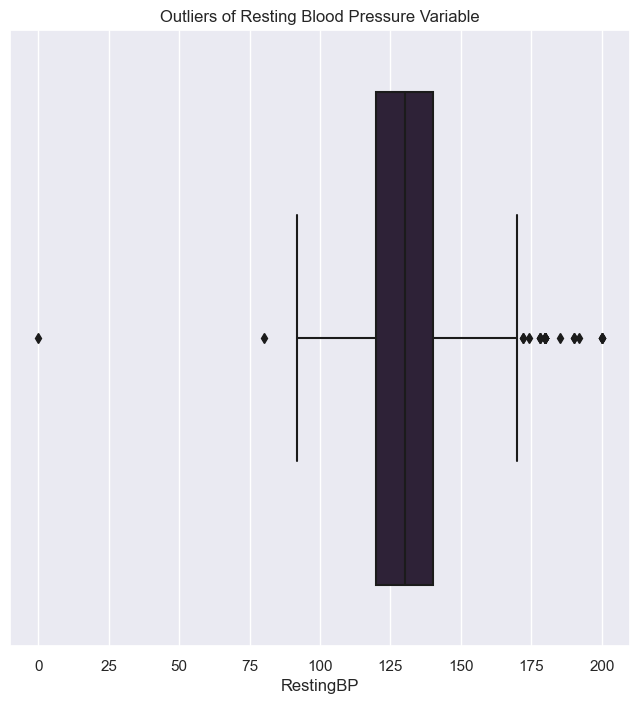

In [26]:
def rbp_boxplot():
    plt.figure(figsize=(8,8))
    ax = sns.boxplot(x="RestingBP",data=num_cols)
    ax.set(title="Outliers of Resting Blood Pressure Variable")
    
rbp_boxplot()

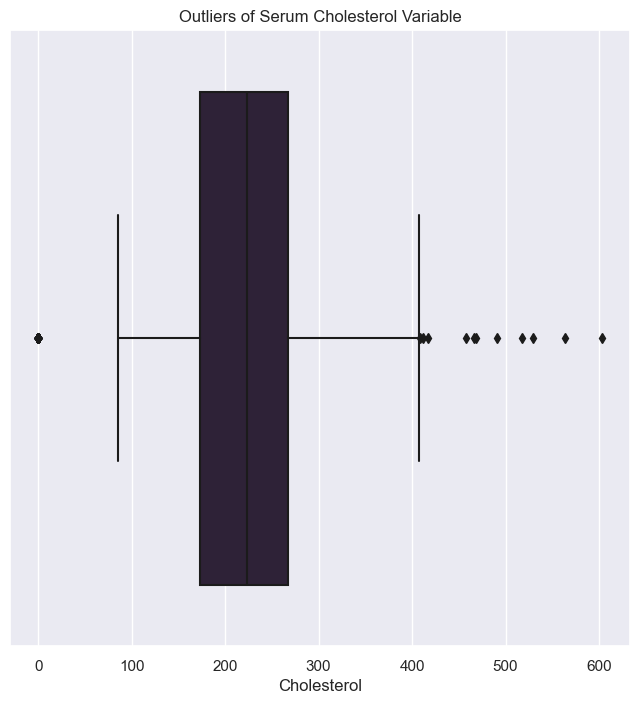

In [27]:
def chol_boxplot():
    plt.figure(figsize=(8,8))
    ax = sns.boxplot(x="Cholesterol",data=num_cols)
    ax.set(title="Outliers of Serum Cholesterol Variable")
    
chol_boxplot()

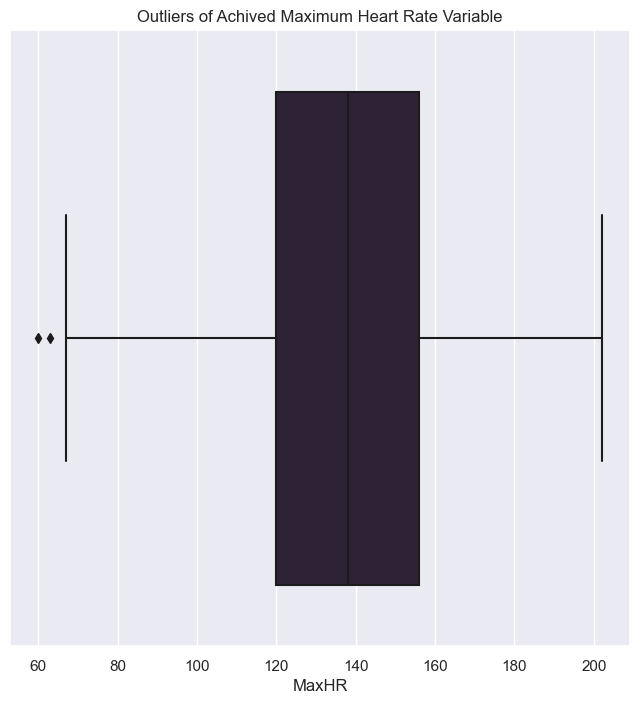

In [28]:
def maxhr_boxplot():
    plt.figure(figsize=(8,8))
    ax = sns.boxplot(x="MaxHR",data=num_cols)
    ax.set(title="Outliers of Achived Maximum Heart Rate Variable")
    
maxhr_boxplot()

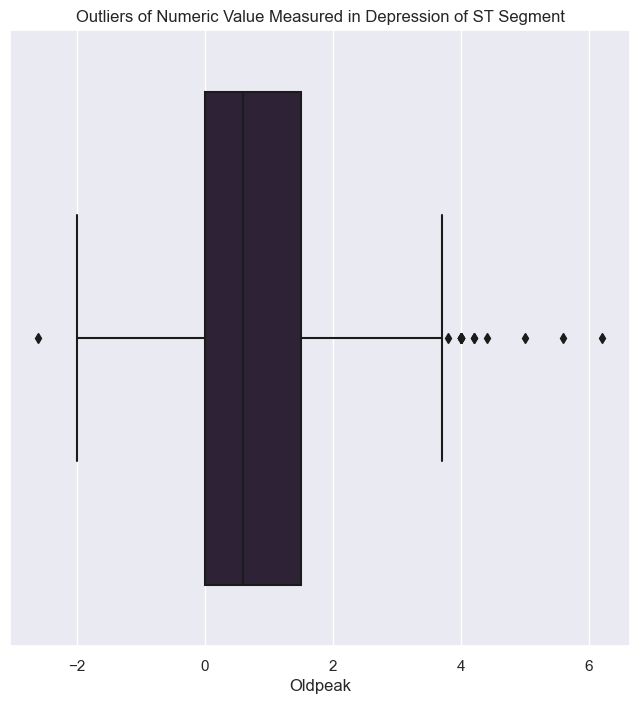

In [29]:
def oldpeak_boxplot():
    plt.figure(figsize=(8,8))
    ax = sns.boxplot(x="Oldpeak",data=num_cols)
    ax.set(title="Outliers of Numeric Value Measured in Depression of ST Segment")
    
oldpeak_boxplot()

# Data Preprocessing

## Meaningless Values

In [30]:
df.drop((df[df["RestingBP"] < 80]).index,inplace=True)

In [31]:
df.drop((df[df["Cholesterol"] <= 0]).index,inplace=True)

In [32]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [33]:
num_cols = df[["Age","RestingBP","Cholesterol","MaxHR","Oldpeak"]]
cat_cols = df[["Sex","ChestPainType","FastingBS","RestingECG","ExerciseAngina","ST_Slope","HeartDisease"]]

## Correlation Analysis

In [34]:
# Correlations between the numerical values
corr = num_cols.corr()
corr

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
Age,1.000000,0.259865,0.058758,-0.382112,0.286006
RestingBP,0.259865,1.000000,0.095939,-0.125774,0.198575
Cholesterol,0.058758,0.095939,1.000000,-0.019856,0.058488
MaxHR,-0.382112,-0.125774,-0.019856,1.000000,-0.259533
Oldpeak,0.286006,0.198575,0.058488,-0.259533,1.000000


<AxesSubplot:>

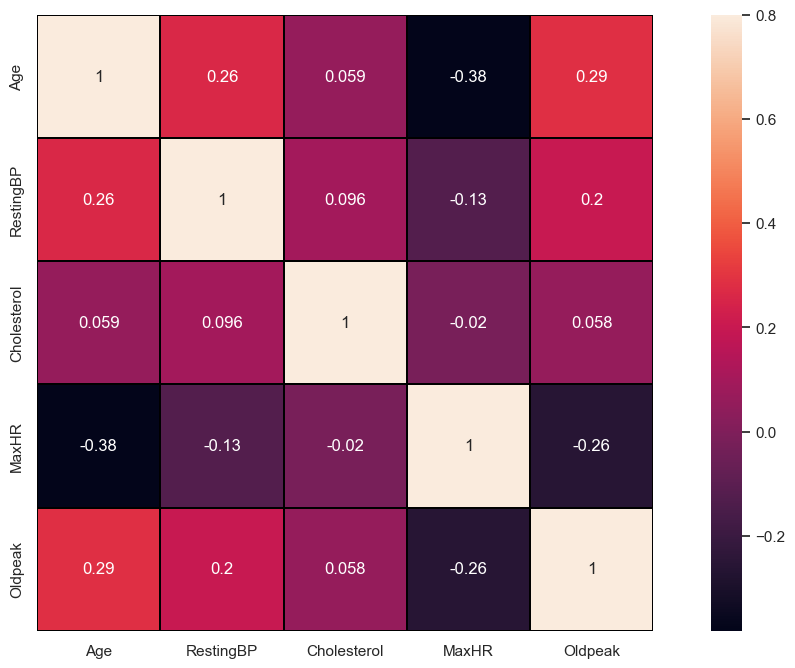

In [35]:
# Visualisation of correlations between the numerical values
corr = num_cols.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, vmax=.8, linewidths=0.05, square=True, annot=True, linecolor="black")

## Encoding

In [36]:
cat_cols.head()

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,M,ATA,0,Normal,N,Up,0
1,F,NAP,0,Normal,N,Flat,1
2,M,ATA,0,ST,N,Up,0
3,F,ASY,0,Normal,Y,Flat,1
4,M,NAP,0,Normal,N,Up,0


In [37]:
from sklearn import preprocessing
lbe = preprocessing.LabelEncoder()
cat_cols["Sex"]=lbe.fit_transform(cat_cols["Sex"])
cat_cols.head()

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,1,ATA,0,Normal,N,Up,0
1,0,NAP,0,Normal,N,Flat,1
2,1,ATA,0,ST,N,Up,0
3,0,ASY,0,Normal,Y,Flat,1
4,1,NAP,0,Normal,N,Up,0


In [38]:
cat_cols = pd.get_dummies(cat_cols, columns=["ChestPainType"],prefix=["ChestPainType"])
cat_cols.head()

,Sex,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,1,0,Normal,N,Up,0,0,1,0,0
1,0,0,Normal,N,Flat,1,0,0,1,0
2,1,0,ST,N,Up,0,0,1,0,0
3,0,0,Normal,Y,Flat,1,1,0,0,0
4,1,0,Normal,N,Up,0,0,0,1,0


In [39]:
cat_cols = pd.get_dummies(cat_cols, columns=["RestingECG"],prefix=["RestingECG"])
cat_cols.head()

,Sex,FastingBS,ExerciseAngina,ST_Slope,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,1,0,N,Up,0,0,1,0,0,0,1,0
1,0,0,N,Flat,1,0,0,1,0,0,1,0
2,1,0,N,Up,0,0,1,0,0,0,0,1
3,0,0,Y,Flat,1,1,0,0,0,0,1,0
4,1,0,N,Up,0,0,0,1,0,0,1,0


In [40]:
lbe = preprocessing.LabelEncoder()
cat_cols["ExerciseAngina"]=lbe.fit_transform(cat_cols["ExerciseAngina"])
cat_cols.head()

,Sex,FastingBS,ExerciseAngina,ST_Slope,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,1,0,0,Up,0,0,1,0,0,0,1,0
1,0,0,0,Flat,1,0,0,1,0,0,1,0
2,1,0,0,Up,0,0,1,0,0,0,0,1
3,0,0,1,Flat,1,1,0,0,0,0,1,0
4,1,0,0,Up,0,0,0,1,0,0,1,0


In [41]:
cat_cols = pd.get_dummies(cat_cols, columns=["ST_Slope"],prefix=["ST_Slope"])
cat_cols.head()

,Sex,FastingBS,ExerciseAngina,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
1,0,0,0,1,0,0,1,0,0,1,0,0,1,0
2,1,0,0,0,0,1,0,0,0,0,1,0,0,1
3,0,0,1,1,1,0,0,0,0,1,0,0,1,0
4,1,0,0,0,0,0,1,0,0,1,0,0,0,1


In [42]:
num_cols.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,40,140,289,172,0.0
1,49,160,180,156,1.0
2,37,130,283,98,0.0
3,48,138,214,108,1.5
4,54,150,195,122,0.0


In [43]:
df = pd.concat([num_cols,cat_cols],axis=1)
df.head(10)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex,FastingBS,ExerciseAngina,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,172,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
1,49,160,180,156,1.0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
2,37,130,283,98,0.0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
3,48,138,214,108,1.5,0,0,1,1,1,0,0,0,0,1,0,0,1,0
4,54,150,195,122,0.0,1,0,0,0,0,0,1,0,0,1,0,0,0,1
5,39,120,339,170,0.0,1,0,0,0,0,0,1,0,0,1,0,0,0,1
6,45,130,237,170,0.0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
7,54,110,208,142,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
8,37,140,207,130,1.5,1,0,1,1,1,0,0,0,0,1,0,0,1,0
9,48,120,284,120,0.0,0,0,0,0,0,1,0,0,0,1,0,0,0,1


# ML Modelling

In [44]:
from sklearn.model_selection import train_test_split

y = df["HeartDisease"]

X = df.drop(["HeartDisease"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.20,random_state = 21)

print(X_train.shape,y_train.shape,X_test.shape,y_test.shape,sep="\n")

(596, 18)
(596,)
(150, 18)
(150,)


Train Score: 
0.8657718120805369
Test Score: 
0.88
Train Matrix: 
[[267  44]
 [ 36 249]]
Test Matrix: 
[[69 10]
 [ 8 63]]
Train Report: 
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       311
           1       0.85      0.87      0.86       285

    accuracy                           0.87       596
   macro avg       0.87      0.87      0.87       596
weighted avg       0.87      0.87      0.87       596

Test Report: 
              precision    recall  f1-score   support

           0       0.90      0.87      0.88        79
           1       0.86      0.89      0.88        71

    accuracy                           0.88       150
   macro avg       0.88      0.88      0.88       150
weighted avg       0.88      0.88      0.88       150



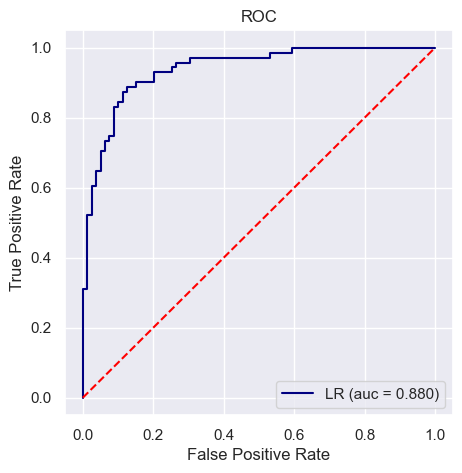

In [45]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve


class __lr_model__:

    def construct(self):
        global lr_model, lr_pred, lr_score, lr_test_pred, lr_test_score
        lr_model = LogisticRegression(solver="liblinear").fit(X_train, y_train)
        lr_pred = lr_model.predict(X_train)
        lr_score = accuracy_score(y_train, lr_pred)
        lr_test_pred = lr_model.predict(X_test)
        lr_test_score = accuracy_score(y_test, lr_test_pred)

    def info(self):
        print("\033[1m" + "Train Score: \n" + "\033[0m" + str(lr_score),
              "\033[1m" + "Test Score: \n" + "\033[0m" + str(lr_test_score),
              "\033[1m" + "Train Matrix: \n" + "\033[0m" +
              str(confusion_matrix(y_train, lr_pred)),
              "\033[1m" + "Test Matrix: \n" + "\033[0m" +
              str(confusion_matrix(y_test, lr_test_pred)),
              "\033[1m" + "Train Report: \n" + "\033[0m" +
              str(classification_report(y_train, lr_pred)),
              "\033[1m" + "Test Report: \n" + "\033[0m" +
              str(classification_report(y_test, lr_test_pred)),
              sep="\n")

    def auc(self):
        plt.figure(figsize=(5, 5))
        roc_auc = roc_auc_score(y_test, lr_model.predict(X_test))
        fpr, tpr, thresholds = roc_curve(
            y_test, lr_model.predict_proba(X_test)[:, 1])
        plt.plot(fpr, tpr, label='LR (auc = %0.3f)' % roc_auc, color='navy')
        plt.plot([0, 1], [0, 1], 'r--')
        plt.title('ROC')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.show()


__lr_model__().construct()
__lr_model__().info()
__lr_model__().auc()
